In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import re

In [2]:
ptt_food_post_df = pd.read_csv('./Data/Ptt/ptt_food_post_list.csv', index_col='Pid')
ptt_food_post_df

title  \
Pid                                  
0         [È£üË®ò] Âè∞Âçó ‰æÜ‰∏ÄÁâá„ÄÇ‰∏ÄÂë®Âè™Ë≥£‰∏âÂ§©ÁöÑÁæéÂë≥Êä´ËïØÂ∫ó   
1               [È£üË®ò] Âè∞Âåó Ëæ∞Â£ΩÂè∏Ââ≤ÁÉπ~Â§ßÈñòËüπÂÆ¥   
2          [È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂   
3               [È£üË®ò] Êñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ   
4        [È£üË®ò] Âè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø   
...                            ...   
1002           [È£üË®ò] Âè∞Âåó ‰∏≠Â±±ÂçÄ Ê¨£ËëâÂè∞ËèúÂâµÂßãÂ∫ó   
1003  [È£üË®ò] Âè∞Âåó‰ø°Áæ©-ÂØìÊâÄÂíñÂï°Utroo cafe-ÂíñÂï°Âª≥   
1004          [È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ   
1005            [È£üË®ò] ÂÄã‰∫∫Ë©ïÊØî ËÇâÊ¨°ÊñπVSÂ§Ø‰∏ãÂéª   
1006            [È£üË®ò] Ê°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®   

                                                   link        date  \
Pid                                                                   
0     https://www.ptt.cc/bbs/Food/M.1669640419.A.EFD...  2022/11/28   
1     https://www.ptt.cc/bbs/Food/M.1669642084.A.CE7...  2022/11/28   
2     https://www.ptt.cc/bbs/Food/M.1669646872.A.E61...  2022/11/28   
3     https://www.ptt.cc/bbs/Food/M.1669680859.A.700...  2022/11/29   
4     https://www.ptt.cc/bbs/Food/M.1669706692.A.EFC...  2022/11/29   
...                                                 ...         ...   
1002  https://www.ptt.cc/bbs/Food/M.1664473643.A.7CA...  2022/09/30   
1003  https://www.ptt.cc/bbs/Food/M.1664505703.A.CC6...  2022/09/30   
1004  https://www.ptt.cc/bbs/Food/M.1664507458.A.84A...  2022/09/30   
1005  https://www.ptt.cc/bbs/Food/M.1664508970.A.AB0...  2022/09/30   
1006  https://www.ptt.cc/bbs/Food/M.1664512596.A.9FD...  2022/09/30   

                                                content  
Pid                                                      
0     È§êÂª≥ÂêçÁ®±Ôºö‰æÜ‰∏ÄÁâáÊ∂àË≤ªÊôÇÈñìÔºö2022Âπ¥/10ÊúàÈõªË©±Ôºö0905-539108Âú∞ÂùÄÔºöÂè∞ÂçóÂ∏Ç‰ªÅÂæ∑ÂçÄ‰∫å...  
1        È§êÂª≥ÂêçÁ®±ÔºöËæ∞Â£ΩÂè∏Ââ≤ÁÉπ   Ê∂àË≤ªÊôÇÈñìÔºö2022Âπ¥/11Êúà   Âú∞ÂùÄÔºöÂè∞ÂåóÂ∏ÇÊùæÂ±±ÂçÄÊï¶ÂåñÂåóË∑Ø...  
2     ÈçãÁâ©ÊúÄÂâçÁ∑ö--ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂Ê∂àË≤ªÊó•ÊúüÔºö2022 Âπ¥ 11 ÊúàÊúâÂúñÊúâÁúüÁõ∏ÂúñÊñá‰∏¶...  
3        È§êÂª≥ÂêçÁ®±ÔºöÊûóÂè£‰∏â‰∫ïOUTLET|ÊîæÈ¨ÜÂøÉÊÉÖ ‰æÜÂêÉÊ∏ØÂºèÁöÑÈªûÈªûÂøÉ   Ê∂àË≤ªÊôÇÈñìÔºö2022/1...  
4        È§êÂª≥ÂêçÁ®±ÔºöÂ§Ø„ÉªÈ≠ØËÇâÈ£Ø   Ê∂àË≤ªÊôÇÈñìÔºö2022Âπ¥/10Êúà110Âè∞ÂåóÂ∏Ç‰ø°Áæ©ÂçÄÊùæÂ±±Ë∑Ø152Ëôü...  
...                                                 ...  
1002  È§êÂª≥ÂêçÁ®±Ôºö Ê¨£ËëâÂè∞ËèúÂâµÂßãÂ∫óÊ∂àË≤ªÊôÇÈñìÔºö2022Âπ¥9ÊúàÂú∞ÂùÄÔºöÂè∞ÂåóÂ∏Ç‰∏≠Â±±ÂçÄÈõôÂüéË°ó34‰πã1ËôüÁáüÊ•≠ÊôÇÈñì...  
1003  È§êÂª≥ÂêçÁ®± : ÂØìÊâÄÂíñÂï° Utroo caf√©Ê∂àË≤ªÊôÇÈñì : 2022Âπ¥/8ÊúàÂú∞ÂùÄ     : ...  
1004     È§êÂª≥ÂêçÁ®±ÔºöÂ±èÊù±„ÄÇÊΩÆÂ∑û„ÄãÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ   Ê∂àË≤ªÊôÇÈñìÔºö2022Âπ¥/8Êúà   Âú∞ÂùÄÔºö...  
1005  ÁéãÂìÅÈõÜÂúòËàáÈ¶¨Ëæ£ÈõÜÂúòÁ≥ªÂàóÁöÑÂêÉÂà∞È£ΩÔºå‰∏ÄÁõ¥ÈÉΩÊòØ‰∏çÈõ∑ÁöÑ‰øùË≠âÔºå‰ª•‰∏ãÁÇ∫ÂÄã‰∫∫Ë¶™Ë∫´ÂêÉÈÅéÁöÑË©ïÊØîÔºå‰∏çÂñúÂãøÊÄ™„ÄÇÈÉΩ‰ª•...  
1006  ÂúñÊñáÁ∂≤Ë™åÁâàË´ãÈªûÔºöhttps://pse.is/4hknuuÂ∫óÂêçÔºöÁ≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®ÈõªË©±Ôºö03 ...  

[1007 rows x 4 columns]

In [3]:
gpt_food_post_df = pd.read_csv('./Data/ChatGPT/chatgpt_generated_articles.csv')
gpt_food_post_df

title  \
0            [È£üË®ò] Âè∞Âåó Ëæ∞Â£ΩÂè∏Ââ≤ÁÉπ~Â§ßÈñòËüπÂÆ¥   
1       [È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂   
2            [È£üË®ò] Êñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ   
3     [È£üË®ò] Âè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø   
4                 [È£üË®ò] Ê°ÉÂúí„ÄÇÈ∫µÂ±ãËôéÂçÉ‰ª£   
...                         ...   
1001       [È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ   
1002         [È£üË®ò] ÂÄã‰∫∫Ë©ïÊØî ËÇâÊ¨°ÊñπVSÂ§Ø‰∏ãÂéª   
1003         [È£üË®ò] Ê°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®   
1004       [È£üË®ò] Âè∞Âåó‰ø°Áæ©ÂÆâÂíå ÂêâÂèØÈ†å‰∏πÈ∫•Â∞àË≥£Â∫ó   
1005      [È£üË®ò] È´òÈõÑ‰∏âÊ∞ë Êó©ÂçàÈ§ê-Â¢®ÁàæÊº¢Â†°Âª∫Â∑•Â∫ó   

                                                content prompt_system  \
0     [È£üË®ò] Âè∞Âåó Ëæ∞Â£ΩÂè∏Ââ≤ÁÉπ~Â§ßÈñòËüπÂÆ¥\n\n- È§êÂª≥ÂêçÁ®±ÔºöËæ∞Â£ΩÂè∏Ââ≤ÁÉπ\n- Ê∂àË≤ªÊôÇÈñìÔºö202...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
1     [È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂\n\n‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢‚ó§‚ó¢...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
2     [È£üË®ò] Êñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ\n\nÂ§ßÂÆ∂Â•ΩÔºåÈÄôË£°ÊòØÂ∞èËëµÔºå‰ªäÂ§©‰æÜË∑üÂ§ßÂÆ∂ÂàÜ‰∫´ÊàëÊúÄËøëÈÄ†Ë®™ÁöÑ...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
3     [È£üË®ò] Âè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø\n\nÂêÑ‰ΩçÁæéÈ£üÂ•ΩÊâãÂÄëÔºå‰ªäÊó•Â∞èÁ∑®Ë¶Å‰ªãÁ¥πÁöÑÊòØ...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
4     [È£üË®ò] Ê°ÉÂúí„ÄÇÈ∫µÂ±ãËôéÂçÉ‰ª£\n\nÈ§êÂª≥ÂêçÁ®±ÔºöÈ∫µÂ±ãËôéÂçÉ‰ª£\nÂú∞ÂùÄÔºöÊ°ÉÂúíÂ∏Ç‰∏≠Â£¢ÂçÄ‰∏≠ÂúíË∑Ø123Ëôü\...       ‰Ω†ÊòØÁæéÈ£üË©ïË´ñÂÆ∂   
...                                                 ...           ...   
1001  [È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ\n\nÂ§ßÂÆ∂Â•ΩÔºåÈÄôÊ¨°Ë¶ÅË∑üÂ§ßÂÆ∂ÂàÜ‰∫´Âú®Â±èÊù±ÊΩÆÂ∑ûÂçÄ‰∏ÄÂÆ∂ÁæéÂë≥...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1002  [È£üË®ò] ÂÄã‰∫∫Ë©ïÊØî ËÇâÊ¨°ÊñπVSÂ§Ø‰∏ãÂéª\n\nÈ§êÂª≥ÂêçÁ®±ÔºöËÇâÊ¨°Êñπ\nÊ∂àË≤ªÊôÇÈñìÔºö2022/09/1...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1003  [È£üË®ò] Ê°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®\n\nÈ§êÂª≥ÂêçÁ®±ÔºöÁ≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®\nÊ∂àË≤ªÊôÇÈñìÔºö2022...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
1004  [È£üË®ò] Âè∞Âåó‰ø°Áæ©ÂÆâÂíå ÂêâÂèØÈ†å‰∏πÈ∫•Â∞àË≥£Â∫ó\n\nÊ∂àË≤ªÊôÇÈñìÔºö2021Âπ¥6Êúà\nÂú∞ÂùÄÔºöÂè∞ÂåóÂ∏Ç‰ø°Áæ©...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1005  [È£üË®ò] È´òÈõÑ‰∏âÊ∞ë Êó©ÂçàÈ§ê-Â¢®ÁàæÊº¢Â†°Âª∫Â∑•Â∫ó\n\nÈ§êÂª≥ÂêçÁ®±ÔºöÂ¢®ÁàæÊº¢Â†°Âª∫Â∑•Â∫ó\nÊ∂àË≤ªÊôÇÈñìÔºö20...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   

                                            prompt_user  
0     ÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÊ∂àË≤ªÊôÇÈñìÈö®Ê©üÈÅ∏2022Âπ¥‰ª•ÂâçÁöÑÊúà‰ªΩ...  
1     ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†ºÔºå...  
2     ‰ª•PTTÁæéÈ£üÁâàÁôºÊñáÈ¢®Ê†ºÔºåÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Êñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåË¶ÅÂåÖÂê´‰ª•...  
3     ‰ª•PTTÁæéÈ£üÁâàÁôºÊñáÈ¢®Ê†ºÔºåÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Âè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø„ÄçÁÇ∫Ê®ôÈ°åÁöÑ...  
4     ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Ê°ÉÂúí„ÄÇÈ∫µÂ±ãËôéÂçÉ‰ª£„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†ºÔºåË¶ÅÊúâÈ§êÂª≥ÂêçÁ®±„ÄÅÂú∞ÂùÄ„ÄÅ...  
...                                                 ...  
1001  ‰ª•PTTÁæéÈ£üÁâàÁôºÊñáÈ¢®Ê†ºÔºåÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåË¶ÅÂåÖ...  
1002  Âú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(2022/11‰ª•Ââç)„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÂºï...  
1003  Âú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(2022/11‰ª•Ââç)„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÂºï...  
1004  ÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÊ∂àË≤ªÊôÇÈñìÈö®Ê©üÈÅ∏2022Âπ¥‰ª•ÂâçÁöÑÊúà‰ªΩ...  
1005  Âú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(2022/11‰ª•Ââç)„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÂºï...  

[1006 rows x 4 columns]

In [54]:
breeze_food_post_df = pd.read_csv('./Data/LocalLLM/breeze_generated_articles.csv')
breeze_food_post_df = breeze_food_post_df.drop(933)
breeze_food_post_df

title  \
0         [È£üË®ò] Âè∞Âçó ‰æÜ‰∏ÄÁâá„ÄÇ‰∏ÄÂë®Âè™Ë≥£‰∏âÂ§©ÁöÑÁæéÂë≥Êä´ËïØÂ∫ó   
1               [È£üË®ò] Âè∞Âåó Ëæ∞Â£ΩÂè∏Ââ≤ÁÉπ~Â§ßÈñòËüπÂÆ¥   
2          [È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂   
3               [È£üË®ò] Êñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ   
4        [È£üË®ò] Âè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø   
...                            ...   
1002           [È£üË®ò] Âè∞Âåó ‰∏≠Â±±ÂçÄ Ê¨£ËëâÂè∞ËèúÂâµÂßãÂ∫ó   
1003  [È£üË®ò] Âè∞Âåó‰ø°Áæ©-ÂØìÊâÄÂíñÂï°Utroo cafe-ÂíñÂï°Âª≥   
1004          [È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ   
1005            [È£üË®ò] ÂÄã‰∫∫Ë©ïÊØî ËÇâÊ¨°ÊñπVSÂ§Ø‰∏ãÂéª   
1006            [È£üË®ò] Ê°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®   

                                                content prompt_system  \
0     „ÄêÈ£üË®ò„ÄëÂè∞Âçó ‰æÜ‰∏ÄÁâá„ÄÇ‰∏ÄÂë®Âè™Ë≥£‰∏âÂ§©ÁöÑÁæéÂë≥Êä´Ëñ©Â∫ó\n\nÂêÑ‰ΩçÂ§ßÂæ∑Â§ßÂÆ∂Â•ΩÔºå‰ªäÂ§©Ë¶Å‰æÜË∑üÂ§ßÂÆ∂ÂàÜ‰∫´‰∏ÄÂÆ∂...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1     „ÄêÈ£üË®ò„ÄëÂè∞Âåó Ëæ∞Â£ΩÂè∏Ââ≤ÁÉπ~Â§ßÈñòËüπÂÆ¥\n\nÂú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(20...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
2     „ÄêÈ£üË®ò„ÄëÊñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂\n\nüåüüåüüåüüåüüåüÔºà5/5Ôºâ\n\nÂêÑ‰ΩçÂ§ßÂ§ßÂ•ΩÔºå‰ªä...       ‰Ω†ÊòØÁæéÈ£üË©ïË´ñÂÆ∂   
3     „ÄêÈ£üË®ò„ÄëÊñ∞ÂåóÊûóÂè£ÔΩúÊûóÂè£‰∏â‰∫ïÁöÑÈªûÈªûÂøÉ\n\nÊ∂àË≤ªÊôÇÈñìÔºö2018Âπ¥3Êúà\nÂú∞ÂùÄÔºöÊñ∞ÂåóÂ∏ÇÊûóÂè£ÂçÄÊñáÂåñ...       ‰Ω†ÊòØÁæéÈ£üË©ïË´ñÂÆ∂   
4     „ÄêÈ£üË®ò„ÄëÂè∞ÂåóÊùæÂ±± Â§Ø„ÉªÈ≠ØËÇâÈ£Ø ÂéüÊú¨ÁöÑ‰∫îÂàÜÂüîÈ≠ØËÇâÈ£Ø\n\nÂú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅ...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
...                                                 ...           ...   
1002  „ÄêÈ£üË®ò„ÄëÂè∞Âåó ‰∏≠Â±±ÂçÄ Ê¨£ËëâÂè∞ËèúÂâµÂßãÂ∫ó\n\nÂêÑ‰ΩçÂ§ßÂæ∑Â§ßÂÆ∂Â•ΩÔºå‰ªäÂ§©Ë¶Å‰æÜË∑üÂ§ßÂÆ∂ÂàÜ‰∫´‰∏Ä‰∏ãÊàëÊúÄËøëÂéªÁöÑ...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1003  „ÄêÈ£üË®ò„ÄëÂè∞Âåó‰ø°Áæ© - ÂØìÊâÄÂíñÂï° Utroo Cafe - ÂíñÂï°Âª≥\n\nÊ∂àË≤ªÊôÇÈñìÔºö2018Âπ¥...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1004  „ÄêÈ£üË®ò„ÄëÂ±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ\n\n‰ªäÂ§©Ë¶ÅË∑üÂ§ßÂÆ∂ÂàÜ‰∫´ÁöÑÊòØ‰ΩçÊñºÂ±èÊù±ÊΩÆÂ∑ûÁöÑ„ÄåÁâõÂ§ßÁ¶è„ÄçÔºå...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   
1005  „ÄêÈ£üË®ò„ÄëÂÄã‰∫∫Ë©ïÊØî ËÇâÊ¨°ÊñπVSÂ§Ø‰∏ãÂéª\n\nÊ∂àË≤ªÊôÇÈñìÔºö2018Âπ¥3Êúà\nÂú∞ÂùÄÔºöÂè∞ÂåóÂ∏ÇËê¨ËèØÂçÄ‰∏≠ËèØ...       ‰Ω†ÊòØÁæéÈ£üÁÜ±ÊÑõËÄÖ   
1006  „ÄêÈ£üË®ò„ÄëÊ°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®\n\nÂâçÂπæÂ§©Ë∑üÊúãÂèãÂà∞ÈæçÊΩ≠Êâæ‰∏ÄÂÆ∂ÂæàÊúâÂêçÁöÑÂÆ¢ÂÆ∂ÊñôÁêÜÂ∫óÂêÉÊôöÈ§êÔºå...       ‰Ω†ÊòØÁæéÈ£üÈÉ®ËêΩÂÆ¢   

                                            prompt_user  
0     ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Âè∞Âçó ‰æÜ‰∏ÄÁâá„ÄÇ‰∏ÄÂë®Âè™Ë≥£‰∏âÂ§©ÁöÑÁæéÂë≥Êä´ËïØÂ∫ó„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†º...  
1     Âú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(2022/11‰ª•Ââç)„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÂºï...  
2     ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Êñ∞Âåó ÈáëÂ§ßÈã§Â£ΩÂñúÁáíÁÉ§ÈçãÁâ©Êñ∞ËéäÂ∫ó‰∏ãÂçàËå∂„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†ºÔºå...  
3     ÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÊ∂àË≤ªÊôÇÈñìÈö®Ê©üÈÅ∏2022Âπ¥‰ª•ÂâçÁöÑÊúà‰ªΩ...  
4     Âú®ÁæéÈ£üË´ñÂ£áÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì(2022/11‰ª•Ââç)„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÂºï...  
...                                                 ...  
1002  ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Âè∞Âåó ‰∏≠Â±±ÂçÄ Ê¨£ËëâÂè∞ËèúÂâµÂßãÂ∫ó„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†ºÔºåË¶ÅÊúâÈ§êÂª≥...  
1003  ÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÊ∂àË≤ªÊôÇÈñìÈö®Ê©üÈÅ∏2022Âπ¥‰ª•ÂâçÁöÑÊúà‰ªΩ...  
1004  ‰ª•PTTÁæéÈ£üÁâàÁôºÊñáÈ¢®Ê†ºÔºåÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Â±èÊù±ÊΩÆÂ∑û-ÁâõÂ§ßÁ¶è„ÄÇÂ±èÊù±ÁâõËÇâÊñôÁêÜ„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåË¶ÅÂåÖ...  
1005  ÁôºË°®È£üË®òÔºåÂÖàÊèê‰æõÈ§êÂª≥ÂêçÁ®±„ÄÅÊ∂àË≤ªÊôÇÈñì„ÄÅÂú∞ÂùÄ„ÄÅÈõªË©±„ÄÅÁáüÊ•≠ÊôÇÈñìÔºåÊ∂àË≤ªÊôÇÈñìÈö®Ê©üÈÅ∏2022Âπ¥‰ª•ÂâçÁöÑÊúà‰ªΩ...  
1006  ÂØ´‰∏ÄÁØá„Äå[È£üË®ò] Ê°ÉÂúíÈæçÊΩ≠ Á≥ßÂúíËå∂ËóùÂÆ¢ÂÆ∂Â∞èÈ§®„ÄçÁÇ∫Ê®ôÈ°åÁöÑÊñáÁ´†ÔºåÈ¢®Ê†ºÔºöPTTÁôºÊñáÈ¢®Ê†ºÔºåË¶ÅÊúâÈ§êÂª≥Âêç...  

[1006 rows x 4 columns]

In [6]:
def full_to_half(s):
    # Â∞áÂ≠óÁ¨¶‰∏≤ s ‰∏≠ÁöÑÂÖ®ÂΩ¢Â≠óÁ¨¶ÂíåÊ®ôÈªûÁ¨¶ËôüËΩâÊèõÁÇ∫ÂçäÂΩ¢„ÄÇ
    n = []
    for char in s:
        code = ord(char)
        if code == 0x3000:  # ÂÖ®ÂΩ¢Á©∫Ê†ºÁõ¥Êé•ËΩâÊèõ
            code = 32
        elif 0xFF01 <= code <= 0xFF5E:  # ÂÖ®ÂΩ¢Â≠óÁ¨¶ÔºàÈô§Á©∫Ê†ºÔºâËΩâÊèõÊàêÂçäÂΩ¢
            code -= 0xFEE0
        n.append(chr(code))
    return ''.join(n)

In [7]:
def remove_urls_and_phones(text):
    """
    ÁßªÈô§ÊñáÂ≠ó‰∏≠ÁöÑÁ∂≤ÂùÄÂíåÈõªË©±ËôüÁ¢º„ÄÇ
    """
    # Ê≠£ÂâáË°®ÈÅîÂºèÂåπÈÖçÁ∂≤ÂùÄ
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)

    # Ê≠£ÂâáË°®ÈÅîÂºèÂåπÈÖçÈõªË©±ËôüÁ¢ºÔºàÈÅ©Áî®ÊñºÂ§öÁ®ÆÂ∏∏Ë¶ãÊ†ºÂºèÔºâ
    phone_pattern = r'(\d{2,4}[-.\s]??\d{3,4}[-.\s]??\d{3,4}|\(\d{2,4}\)\s*\d{3,4}[-.\s]??\d{3,4}|\d{10,11})'
    text = re.sub(phone_pattern, '', text)

    return text

In [8]:
def remove_english(text):
    """
    ÁßªÈô§ÊñáÂ≠ó‰∏≠ÁöÑÊâÄÊúâËã±ÊñáÂ≠óÁ¨¶„ÄÇ
    """
    # Ê≠£ÂâáË°®ÈÅîÂºèÂåπÈÖçÊâÄÊúâËã±ÊñáÂ≠óÊØçÂíåËã±ÊñáÂñÆË©û
    pattern = r'[A-Za-z]+'
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [9]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        "\U0001F600-\U0001F64F"  # Ë°®ÊÉÖÁ¨¶Ëôü
        "\U0001F300-\U0001F5FF"  # Á¨¶ËôüÂíåÂúñÊ°à
        "\U0001F680-\U0001F6FF"  # ‰∫§ÈÄöÂíåÁ¨¶Ëôü
        "\U0001F700-\U0001F77F"  # ËóùË°ìÁ¨¶Ëôü
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)

In [10]:
def load_dictionary(file_path):
    with open(file_path, encoding='utf-8', mode='r') as f:
        dictionary = [l.strip() for l in f]
    return dictionary

In [11]:
def remove_stopwords(text, stopwords):
    # ‰ΩøÁî®ÂàóË°®Êé®Â∞éÂºèÈÅéÊøæÊéâÂÅúÁî®Ë©û
    filtered_words = remove_urls_and_phones(text)
    filtered_words = remove_english(filtered_words)
    filtered_words = remove_emojis(filtered_words)
    filtered_words = "".join(c for c in filtered_words if c not in ('Ôºõ','Ôºå','„ÄÇ','ÔºÅ','Ôºö','„Äå','„Äç','‚Ä¶','„ÄÅ','Ôºü','„Äê','„Äë','.',':','?',';','!','~','`','+','-','<','>','/','[',']','{','}',"'",'"','\\', ' ', '‚Äß','„Éª','‚ó¢','‚ó§','\n','‚òÖ','‚òÜ','‚óÜ','‚óá','‚óé','‚óã','‚óè','‚óê','‚óë','‚ñ≤','‚ñº','‚ñ≥','‚ñΩ','‚ó¢','‚ó£','‚ó•','‚ó§','‚ñ∑','‚óÅ','‚ñ∂','‚óÄ','‚ô†','‚ô£','‚ô•','‚ô¶','‚ô®','‚äô','‚äï','‚ñ®','‚ñß','‚ñ¶','‚ñ•','‚ñ§','‚ñ£','‚ñ¢','‚ñ°','‚ñ†'))
    filtered_words = "".join(word for word in filtered_words if word not in stopwords)
    filtered_words = filtered_words.replace(u'\u3000', u' ')
    # Â∞áÈÅéÊøæÂæåÁöÑÂñÆË©ûÂàóË°®ÈáçÊñ∞ÁµÑÂêàÊàêÂ≠óÁ¨¶‰∏≤
    return filtered_words

In [63]:
ptt_contents = ptt_food_post_df.loc[:, 'content']
gpt_contents = gpt_food_post_df.loc[:, 'content']
breeze_contents = breeze_food_post_df.loc[:, 'content']

In [64]:
stop_words = load_dictionary('./Data/stopwords_tc.txt')
ptt_remove_stopword_contents = []
gpt_remove_stopword_contents = []
breeze_remove_stopword_contents = []
for c in ptt_contents:
    ptt_remove_stopword_contents.append(remove_stopwords(c, stop_words))

for c in gpt_contents:
    gpt_remove_stopword_contents.append(remove_stopwords(c, stop_words))

for c in breeze_contents:
    breeze_remove_stopword_contents.append(remove_stopwords(c, stop_words))

# Ê∑ªÂä†Ê®ôË®ò‰∏¶Âêà‰Ωµ DataFrame
ptt_contents_df = pd.DataFrame(ptt_remove_stopword_contents, columns=['remove_stopword_content'])
ptt_contents_df['source'] = 'ptt'

gpt_contents_df = pd.DataFrame(gpt_remove_stopword_contents, columns=['remove_stopword_content'])
gpt_contents_df['source'] = 'gpt'

breeze_contents_df = pd.DataFrame(breeze_remove_stopword_contents, columns=['remove_stopword_content'])
breeze_contents_df['source'] = 'breeze'

In [14]:
import jieba
# ‰ΩøÁî® Jieba ÈÄ≤Ë°åÂàáË©û
def jieba_cut(text):
    stop_words = {'È£üË®ò', 'Á∂≤Ë™å'}
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

## TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_vectorlize_freq(posts):

    # Â∞áÊØèÁØáÊñáÁ´†ÈÄ≤Ë°åÂàáË©û
    cut_posts = [jieba_cut(post) for post in posts]

    # ÂàùÂßãÂåñ TfidfVectorizerÔºåÈÄôË£°ÂèØ‰ª•Ë™øÊï¥ÂèÉÊï∏
    vectorizer = TfidfVectorizer()

    # Â∞áÂàáË©ûÂæåÁöÑÊñáÁ´†ÂÖßÂÆπËΩâÊèõÁÇ∫ TF-IDF Áü©Èô£
    tfidf_matrix = vectorizer.fit_transform(cut_posts)

    # Ë©ûÈ†ªÁµ±Ë®à
    word_counts = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
    word_value = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'value': word_counts})
    word_value = word_value.sort_values(by='value', ascending=False)

    # È°ØÁ§∫Ë©ûÈ†ªÂâç10ÁöÑË©û
    print(word_value.head(20))

    # # Áç≤ÂèñÁâπÂæµÂêçÁ®±ÔºàË©ûÂΩôÔºâ
    # feature_names = vectorizer.get_feature_names_out()

    # # Â∞á TF-IDF Áü©Èô£ËΩâÊèõÁÇ∫ DataFrame
    # tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=range(len(posts)), columns=feature_names)

    return word_value

In [16]:
# ÊèêÂèñÊñáÁ´†ÂÖßÂÆπ‰∏¶ÈÄ≤Ë°å TF-IDF ÂêëÈáèÂåñ
ptt_tfidf_value = get_tfidf_vectorlize_freq(ptt_contents_df['remove_stopword_content'])

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.465 seconds.
Prefix dict has been built succesfully.


      term      value
12768   ÊôÇÈñì  28.234242
4085    Âè£ÊÑü  19.851546
30753   È§êÂª≥  19.573941
4068    Âè£Âë≥  18.704802
4917    Âë≥ÈÅì  18.374693
11378   Êé®Ëñ¶  17.097113
11529   Êê≠ÈÖç  17.072432
4962    ÂíñÂï°  16.037285
5235    ÂñúÊ≠°  15.923216
12989   ÊúãÂèã  14.950279
17181   ÁáüÊ•≠  14.376405
15724   Ê∂àË≤ª  14.271059
29597   ÈõªË©±  14.216697
31890   È∫µÂåÖ  13.566098
30868   È§êÈªû  13.469088
27384   ÈÅ∏Êìá  13.466830
17615   ÁâõËÇâ  13.299482
9072    Â∫óÂÆ∂  13.224059
10304   ÊÑüË¶∫  13.148115
4689    ÂêçÁ®±  13.057933


In [17]:
# ÊèêÂèñÊñáÁ´†ÂÖßÂÆπ‰∏¶ÈÄ≤Ë°å TF-IDF ÂêëÈáèÂåñ
gpt_tfidf_value = get_tfidf_vectorlize_freq(gpt_contents_df['remove_stopword_content'])

      term      value
10521   È§êÂª≥  32.336984
4200    ÊñôÁêÜ  31.589613
7493    ÁæéÈ£ü  28.531202
7467    ÁæéÂë≥  26.448252
662     ÂÉπÊ†º  24.835386
1695    ÂíñÂï°  24.476940
4462    ÊôÇÈñì  23.454140
4041    Êê≠ÈÖç  22.976684
1486    Âè∞Âåó  20.807521
3684    ÊÑüÂèó  19.693996
871     ÂàÜ‰∫´  19.143143
7752    ËàíÈÅ©  18.215390
1737    ÂìÅÂöê  18.135343
1416    Âè£ÊÑü  17.983829
4547    ÊúçÂãô  17.798520
657     ÂÉπ‰Ωç  16.849805
4007    Êé®Ëñ¶  16.846857
6407    ÁîúÈªû  16.767534
3866    ÊãõÁâå  16.738626
5381    Êµ∑ÈÆÆ  16.612540


In [65]:
# ÊèêÂèñÊñáÁ´†ÂÖßÂÆπ‰∏¶ÈÄ≤Ë°å TF-IDF ÂêëÈáèÂåñ
breeze_tfidf_value = get_tfidf_vectorlize_freq(breeze_contents_df['remove_stopword_content'])

      term      value
4056    Êê≠ÈÖç  31.127416
4239    ÊñôÁêÜ  28.694398
7615    ÁæéÂë≥  27.910354
4511    ÊôÇÈñì  23.483523
1418    Âè£ÊÑü  21.875829
1771    ÂíñÂï°  18.436871
10998   È§êÂª≥  18.177762
1750    Âë≥ÈÅì  17.879081
1497    Âè∞Âåó  17.167775
5558    Êµ∑ÈÆÆ  17.115482
4021    Êèê‰æõ  17.102523
8350    Ëî¨Ëèú  16.798824
4317    Êñ∞ÈÆÆ  16.757342
6203    ÁâõËÇâ  16.726494
5849    ÊøÉÈÉÅ  16.067078
10485   ÈõªË©±  15.851044
6113    ÁáüÊ•≠  15.704333
9084    Ë±êÂØå  15.627399
649     ÂÉπ‰Ωç  15.573821
653     ÂÉπÊ†º  15.047831


In [22]:
def wordcloud(s):
    # Ë©ûÈõ≤
    s = ' '.join(s['term'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white',font_path='./NotoSansTC-VariableFont_wght.ttf', stopwords=['√©'], max_words = 70, min_font_size = 8)
    wordcloud.generate(s)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

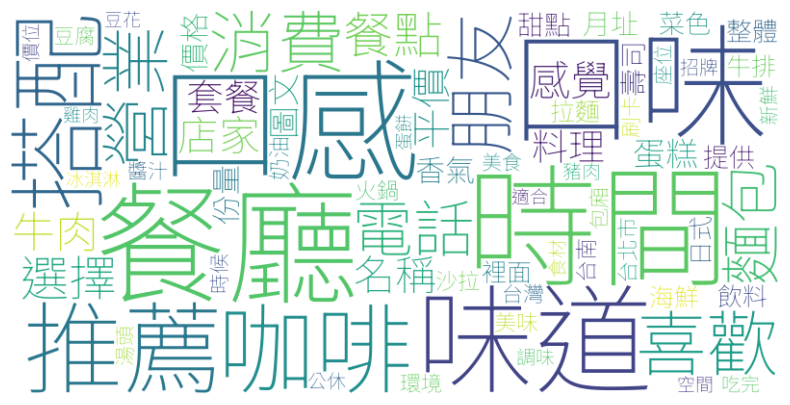

In [23]:
# ÊñáÂ≠óÈõ≤
wordcloud(ptt_tfidf_value)

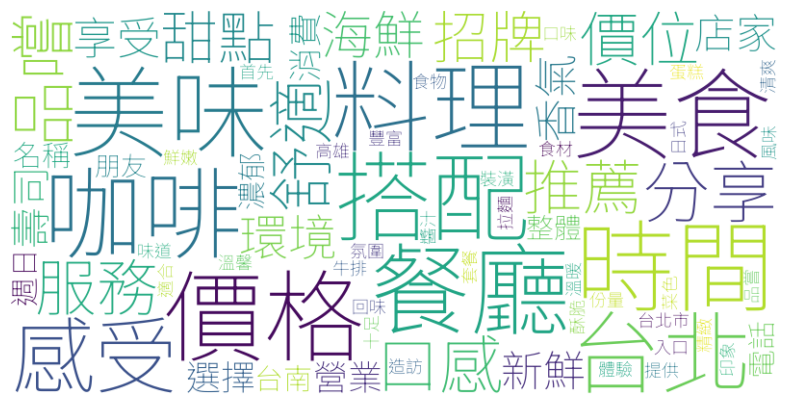

In [24]:
# ÊñáÂ≠óÈõ≤
wordcloud(gpt_tfidf_value)

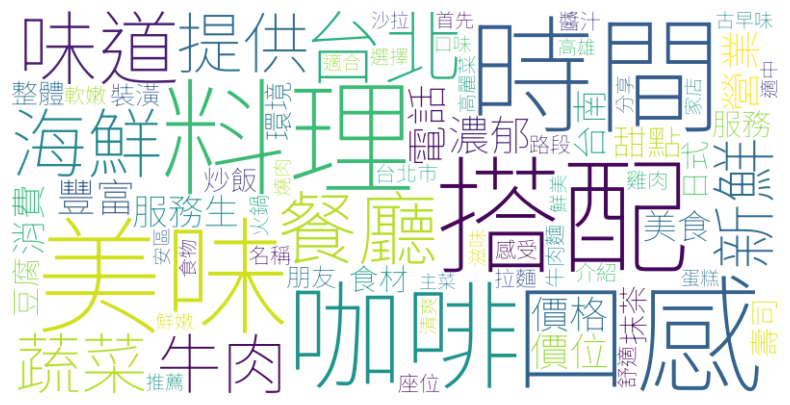

In [56]:
# ÊñáÂ≠óÈõ≤
wordcloud(breeze_tfidf_value)

## Ë©ûÈ†ª

In [26]:
def get_segment_freq(posts):

    # Â∞áÊØèÁØáÊñáÁ´†ÈÄ≤Ë°åÂàáË©û
    cut_posts = [jieba_cut(post) for post in posts]

    seg_list = []
    for p in cut_posts:
        seg_list.append(p.split(' '))
        
    seg_list = [x for xs in seg_list for x in xs]
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq.reset_index())
    sef_freq.rename({'seg': 'term'}, inplace=True, axis=1)
    # word_freq = pd.DataFrame({'term': sef_freq.index.values, 'count': sef_freq['count']})
    # word_freq = word_freq.sort_values(by='count', ascending=False)  

    # È°ØÁ§∫Ë©ûÈ†ªÂâç10ÁöÑË©û
    print(sef_freq.head(20))

    return sef_freq

In [76]:
ptt_freq = get_segment_freq(ptt_contents_df['remove_stopword_content'])

   term  count
0     ÂêÉ   4705
1         3770
2    ÊôÇÈñì   2282
3     Èªû   1544
4     ÂÖÉ   1510
5    È§êÂª≥   1441
6    Âè£ÊÑü   1245
7     Ë™™   1234
8     Ê¨°   1042
9    ÁáüÊ•≠   1016
10   ÈõªË©±    978
11   Âë≥ÈÅì    974
12   Âè£Âë≥    965
13   Ê∂àË≤ª    950
14   Êê≠ÈÖç    938
15   Êé®Ëñ¶    930
16   ÂêçÁ®±    816
17    Âπ¥    808
18    ÂÖ©    807
19    ÊÉ≥    806


In [28]:
gpt_freq = get_segment_freq(gpt_contents_df['remove_stopword_content'])

   term  count
0    È§êÂª≥   1938
1    ÊôÇÈñì   1610
2    ÁæéÂë≥   1500
3     ÂÆ∂   1465
4    ÁæéÈ£ü   1379
5    ÊñôÁêÜ   1163
6    Êê≠ÈÖç   1140
7    ÂÉπÊ†º   1111
8    ÁáüÊ•≠   1041
9    ÈõªË©±   1013
10   ÊÑüÂèó    877
11    Ë£°    836
12   Ê∂àË≤ª    813
13   Âè£ÊÑü    798
14   ÂêçÁ®±    785
15   ÂìÅÂöê    780
16   ËàíÈÅ©    765
17   ÊúçÂãô    751
18   Êé®Ëñ¶    736
19   ÊãõÁâå    726


In [66]:
breeze_freq = get_segment_freq(breeze_contents_df['remove_stopword_content'])

   term  count
0    Êê≠ÈÖç   2149
1    ÁæéÂë≥   1771
2    ÊôÇÈñì   1703
3     Ê¨°   1259
4    Âè£ÊÑü   1216
5    ÊñôÁêÜ   1198
6    ÈõªË©±   1135
7    ÁáüÊ•≠   1132
8     ÂêÉ   1093
9     ÂÆ∂    946
10   È§êÂª≥    909
11    Èùû    888
12   Âë≥ÈÅì    825
13   ÊøÉÈÉÅ    774
14   Êèê‰æõ    764
15   ÂÉπ‰Ωç    752
16   Ê∂àË≤ª    743
17   Êñ∞ÈÆÆ    731
18   Ëî¨Ëèú    681
19    Âè£    671


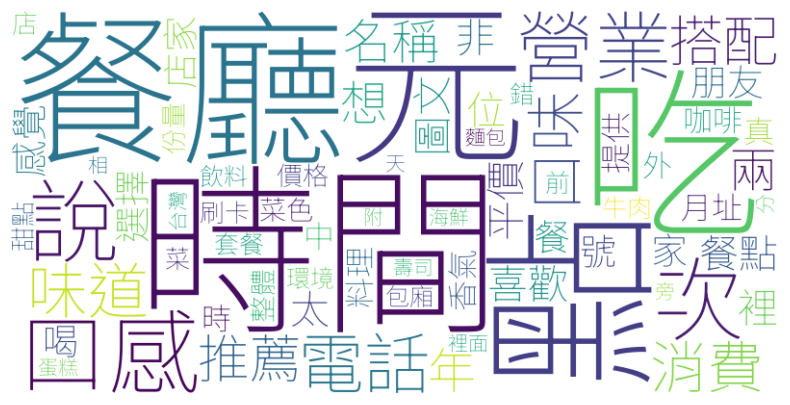

In [30]:
# ÊñáÂ≠óÈõ≤
wordcloud(ptt_freq)

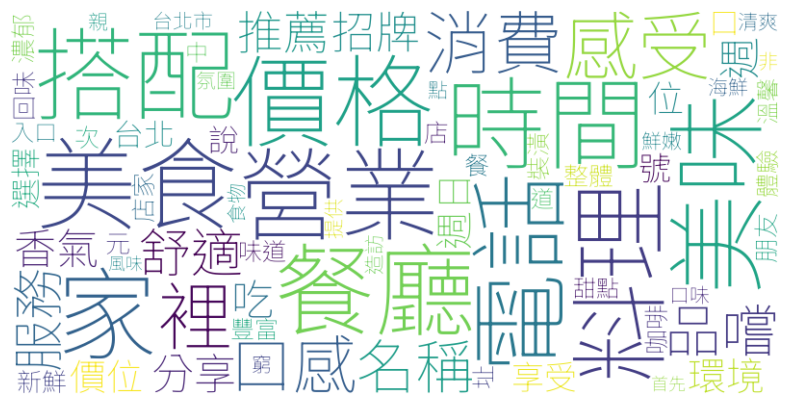

In [31]:
# ÊñáÂ≠óÈõ≤
wordcloud(gpt_freq)

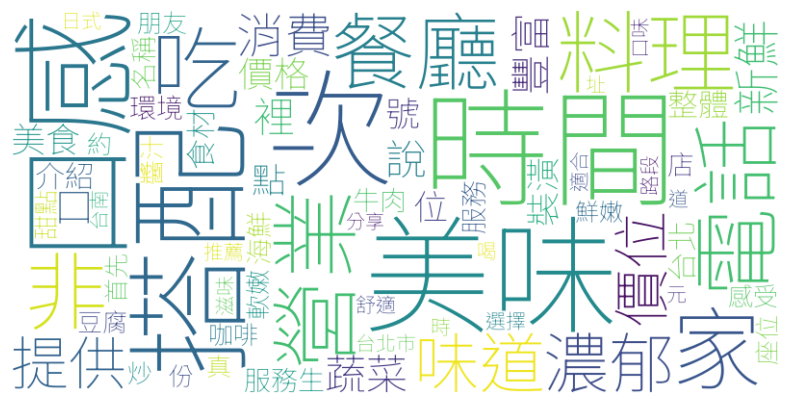

In [67]:
wordcloud(breeze_freq)

## Ë©ûÊï∏

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_segment_num(posts_df):

    # Â∞áÊØèÁØáÊñáÁ´†ÈÄ≤Ë°åÂàáË©û
    cut_posts = [jieba_cut(post) for post in posts_df['remove_stopword_content']]

    posts_num = []
    for p in cut_posts:
        posts_num.append(len(p.split(' ')))

    df = posts_df.copy()
    # Ë®àÁÆóÊØèÁØáÊñáÁ´†ÁöÑË©ûÊï∏
    df['word_count'] = posts_num

    # ÊâìÂç∞Áµ±Ë®àÊï∏Êìö
    print(df['word_count'].describe())

    # Áπ™Ë£ΩË©ûÊï∏ÂàÜ‰ΩàÁöÑÁõ¥ÊñπÂúñÂíåÂØÜÂ∫¶Âúñ
    plt.figure(figsize=(12, 6))

    # Áõ¥ÊñπÂúñ
    plt.subplot(1, 2, 1)
    sns.histplot(df['word_count'], kde=False, bins=10)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.title('Distribution of Article Word Counts')

    # ÂØÜÂ∫¶Âúñ
    plt.subplot(1, 2, 2)
    sns.kdeplot(df['word_count'], shade=True)
    plt.xlabel('Word Count')
    plt.ylabel('Density')
    plt.title('Density Plot of Article Word Counts')


    plt.tight_layout()
    plt.show()

count    1007.000000
mean      252.646475
std       172.933818
min        40.000000
25%       138.000000
50%       218.000000
75%       315.000000
max      1459.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


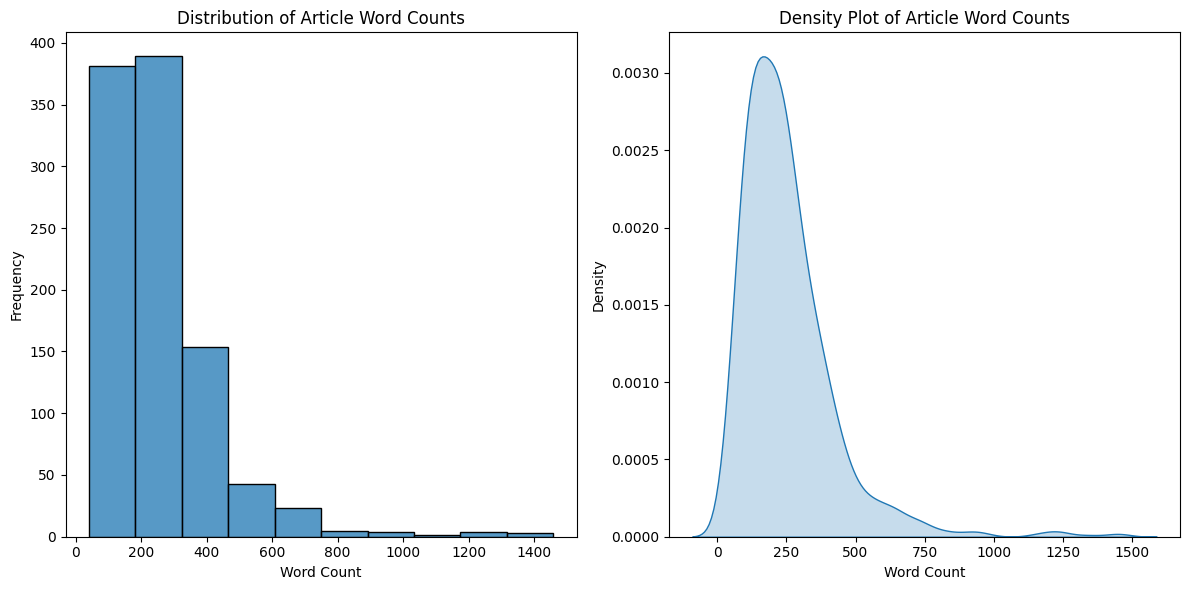

In [35]:
get_segment_num(ptt_contents_df)

count    1006.000000
mean      142.209742
std        31.020916
min        13.000000
25%       120.250000
50%       137.500000
75%       160.750000
max       274.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


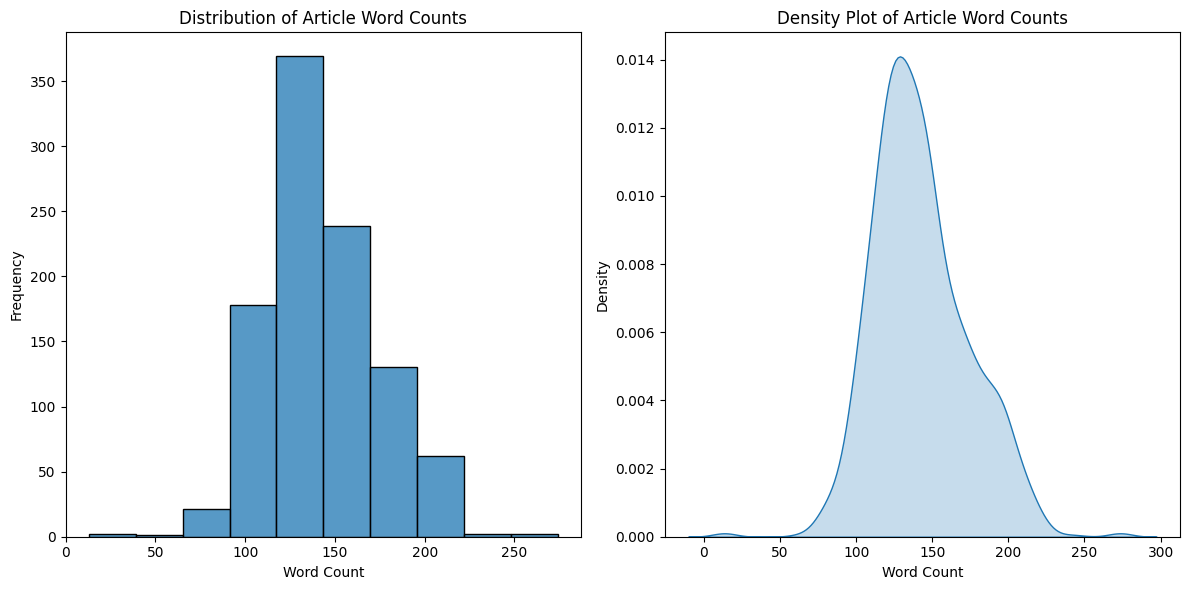

In [36]:
get_segment_num(gpt_contents_df)

count    1006.000000
mean      163.532803
std        46.822736
min         4.000000
25%       136.000000
50%       158.000000
75%       187.000000
max       717.000000
Name: word_count, dtype: float64


/tmp/ipykernel_1176836/3656744368.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['word_count'], shade=True)


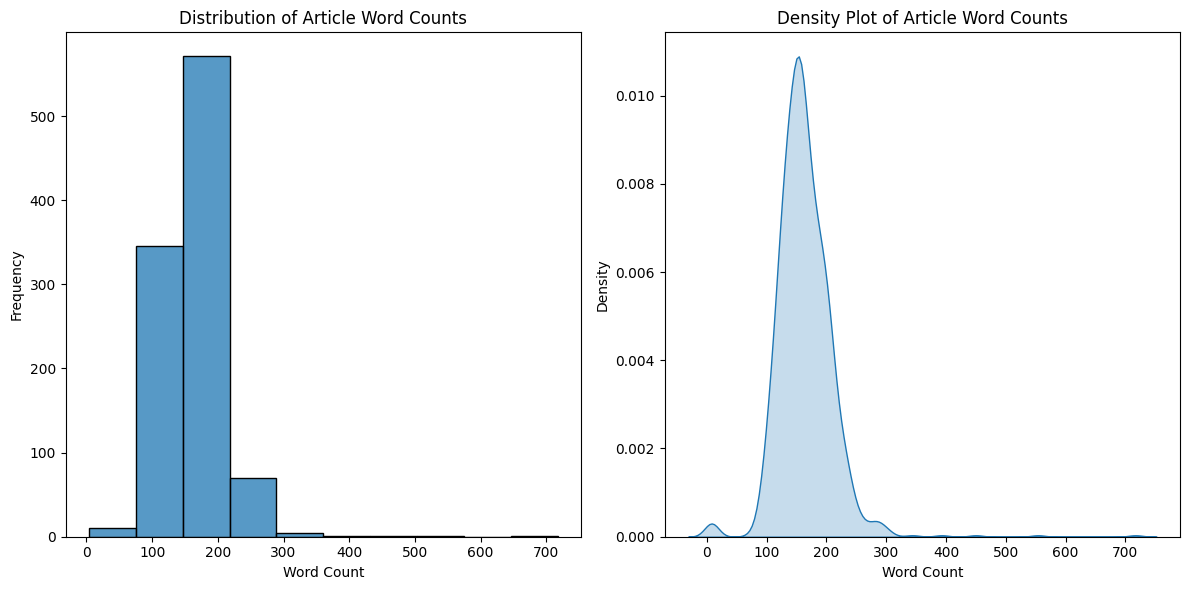

In [68]:
get_segment_num(breeze_contents_df)

## ÊñáÁ´†Èï∑Â∫¶

In [38]:
def get_article_len(posts_df):

    df = posts_df.copy()
    # Ë®àÁÆóÊØèÁØáÊñáÁ´†ÁöÑË©ûÊï∏
    df['length'] = df['remove_stopword_content'].str.len()

    # ÊâìÂç∞Áµ±Ë®àÊï∏Êìö
    print(df['length'].describe())

    # Áπ™Ë£ΩË©ûÊï∏ÂàÜ‰ΩàÁöÑÁõ¥ÊñπÂúñÂíåÂØÜÂ∫¶Âúñ
    plt.figure(figsize=(12, 6))

    # Áõ¥ÊñπÂúñ
    plt.subplot(1, 2, 1)
    sns.histplot(df['length'], kde=False, bins=10)
    plt.xlabel('Total length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Article Word Counts')

    # ÂØÜÂ∫¶Âúñ
    plt.subplot(1, 2, 2)
    sns.kdeplot(df['length'], shade=True)
    plt.xlabel('Total length')
    plt.ylabel('Density')
    plt.title('Density Plot of Article Word Counts')


    plt.tight_layout()
    plt.show()

count    1007.000000
mean      454.442900
std       307.449109
min        74.000000
25%       249.500000
50%       397.000000
75%       567.500000
max      2590.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


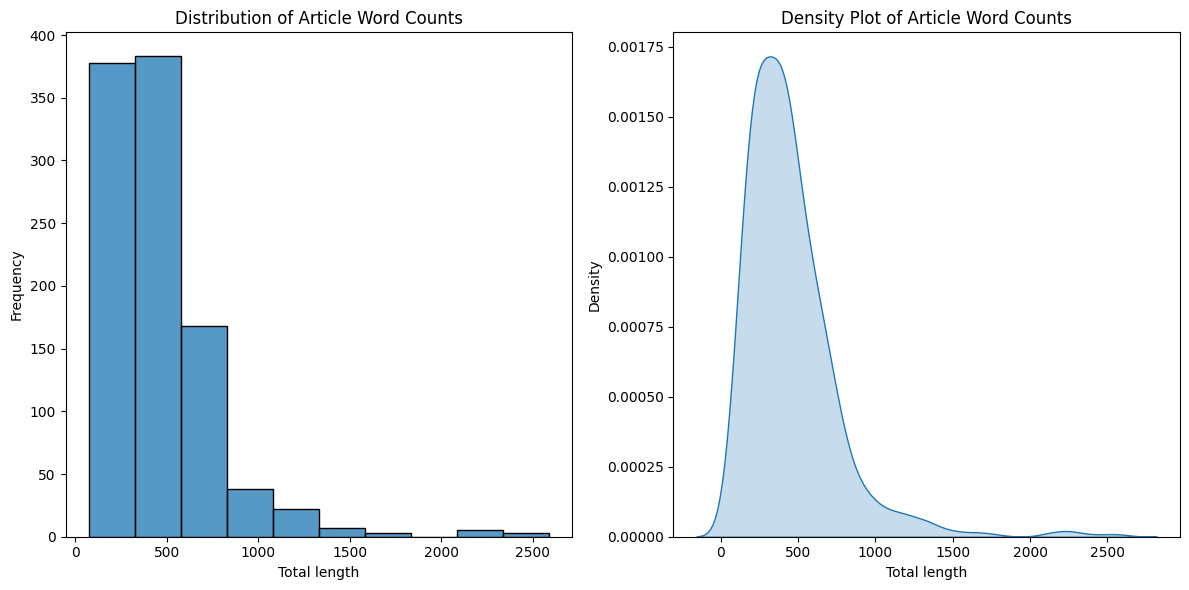

In [39]:
get_article_len(ptt_contents_df)

count    1006.000000
mean      266.073559
std        57.432292
min        22.000000
25%       227.250000
50%       259.000000
75%       299.750000
max       507.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


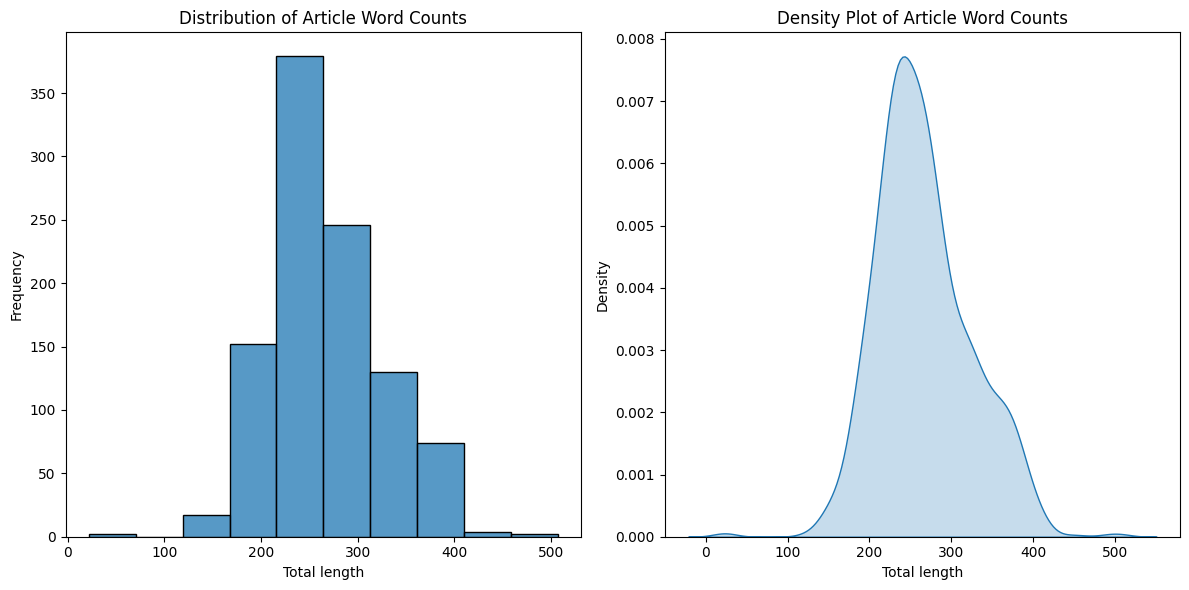

In [40]:
get_article_len(gpt_contents_df)

count    1006.000000
mean      307.900596
std        86.404314
min        10.000000
25%       257.000000
50%       297.500000
75%       353.750000
max      1370.000000
Name: length, dtype: float64


/tmp/ipykernel_1176836/3649360305.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


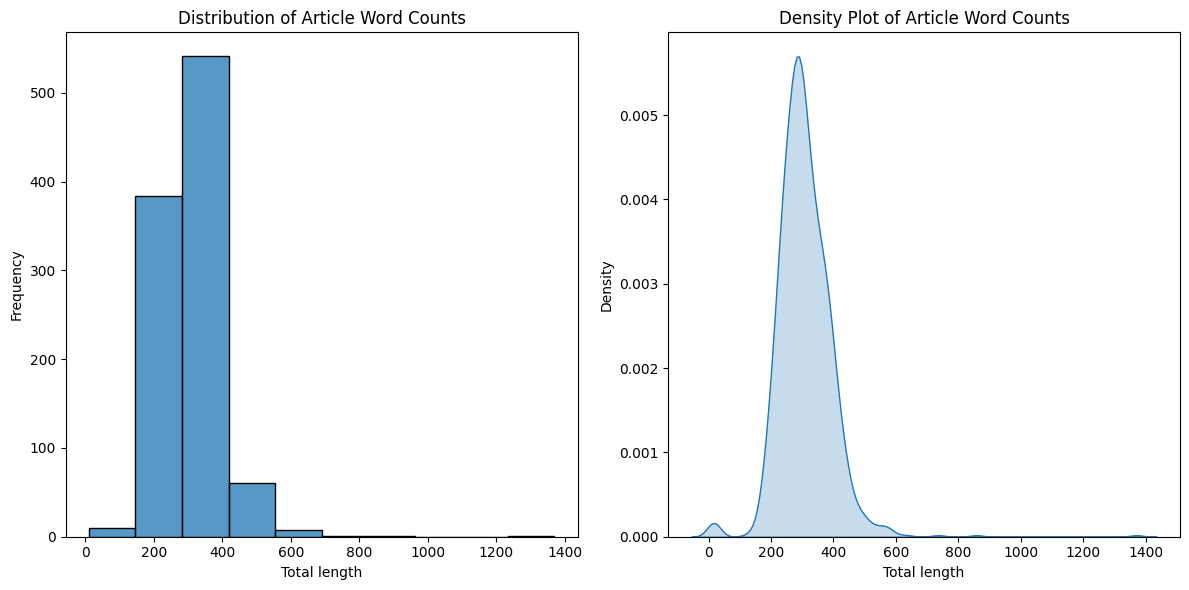

In [69]:
get_article_len(breeze_contents_df)